In [1]:
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Conv2D, Dropout, Flatten, MaxPooling2D

import matplotlib.pyplot as plt
%matplotlib inline

## Load and Preprocess the Data

In [2]:
(x_train, y_train), (x_test, y_test) = tf.keras.datasets.mnist.load_data()

8


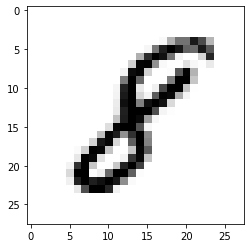

In [3]:
image_index = 7777

print(y_train[image_index])
plt.imshow(x_train[image_index], cmap='Greys')

In [4]:
x_train.shape

(60000, 28, 28)

In [5]:
# Reshaping the array to 4-dims so that it can work with the Keras API
x_train = x_train.reshape(x_train.shape[0], 28, 28, 1)
x_test = x_test.reshape(x_test.shape[0], 28, 28, 1)
input_shape = (28, 28, 1)
# Making sure that the values are float so that we can get decimal points after division
x_train = x_train.astype('float32')
x_test = x_test.astype('float32')
# Normalizing the RGB codes by dividing it to the max RGB value.
x_train /= 255
x_test /= 255
print('x_train shape:', x_train.shape)
print('Number of images in x_train', x_train.shape[0])
print('Number of images in x_test', x_test.shape[0])

x_train shape: (60000, 28, 28, 1)
Number of images in x_train 60000
Number of images in x_test 10000


## Build and Train Model

In [6]:
model = Sequential()
model.add(Conv2D(28, kernel_size=(3,3), input_shape=input_shape))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Flatten()) # Flattening the 2D arrays for fully connected layers
model.add(Dense(128, activation=tf.nn.relu))
model.add(Dropout(0.2))
model.add(Dense(10,activation=tf.nn.softmax))

In [7]:
model.compile(optimizer='adam', 
              loss='sparse_categorical_crossentropy', 
              metrics=['accuracy'])

model.fit(x=x_train, y=y_train, epochs=10)

Train on 60000 samples
Epoch 1/10
60000/60000 [==============================] - 12s 194us/sample - loss: 0.2070 - accuracy: 0.9380
Epoch 2/10
60000/60000 [==============================] - 11s 183us/sample - loss: 0.0838 - accuracy: 0.9745
Epoch 3/10
60000/60000 [==============================] - 11s 185us/sample - loss: 0.0580 - accuracy: 0.9815
Epoch 4/10
60000/60000 [==============================] - 11s 189us/sample - loss: 0.0415 - accuracy: 0.9865
Epoch 5/10
60000/60000 [==============================] - 11s 190us/sample - loss: 0.0360 - accuracy: 0.9880
Epoch 6/10
60000/

## Test and Predict

In [8]:
model.evaluate(x_test, y_test)

10000/10000 [==============================] - 1s 61us/sample - loss: 0.0658 - accuracy: 0.9838


[0.06575533129040195, 0.9838]

3


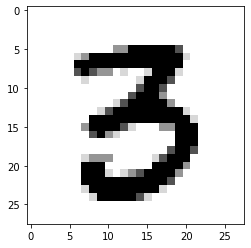

In [9]:
image_index = 5555
plt.imshow(x_test[image_index].reshape(28, 28), cmap='Greys')
pred = model.predict(x_test[image_index].reshape(1, 28, 28, 1))
print(pred.argmax())